## Import Libraries

In [1]:
#Importing the required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from plotly.offline import iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore') 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
dataset=pd.read_csv('houses_to_rent.csv')
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
#General information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [4]:
#General statistical
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0



 ### 1. How is the distribution of each city?

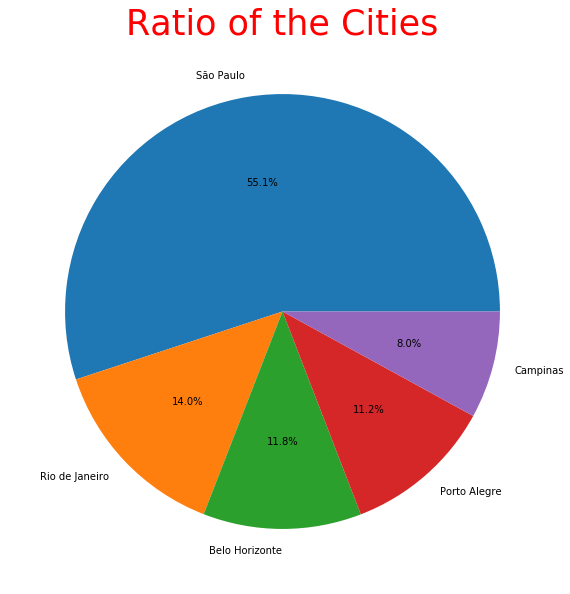

In [5]:
city_qty=dataset.city.value_counts()

plt.figure(figsize=(15,10))
plt.pie(x=city_qty, labels=city_qty.index, autopct='%1.1f%%')
plt.title('Ratio of the Cities',color = 'red',fontsize = 35)
plt.show()

<a id="2"></a><br>
### 2. How many house owners accept animals in the home?

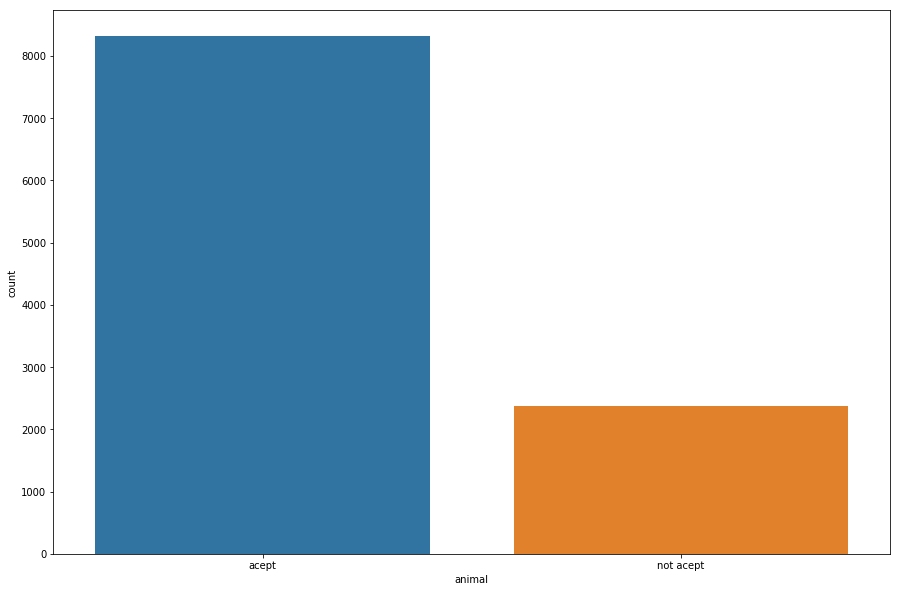

In [6]:
plt.figure(figsize=(15,10))
sns.countplot(dataset['animal'])
plt.show()

<a id="3"></a><br>
### 3. How many houses are furnished?

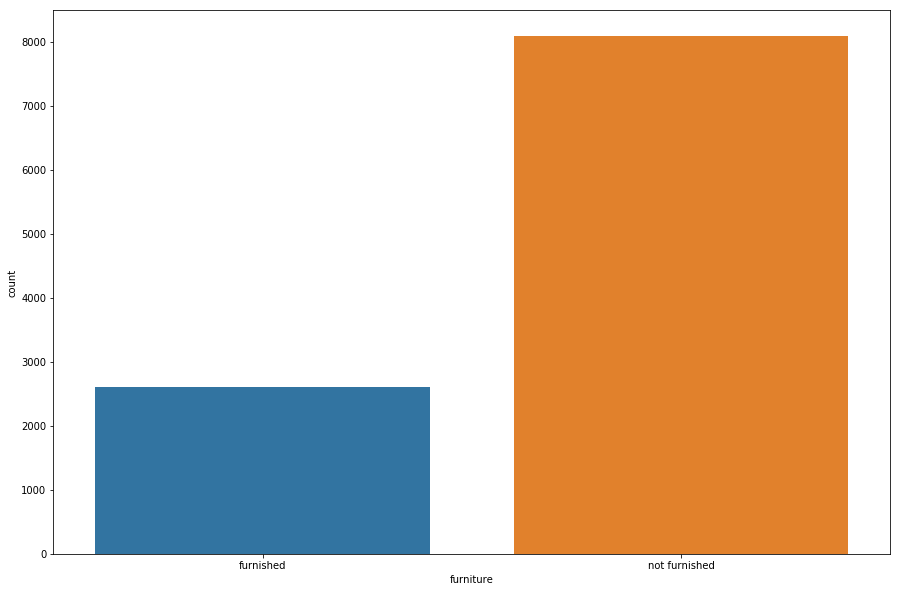

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(x="furniture", data=dataset)
plt.show()

<a id="4"></a><br>
### 4. Where is the accumulation point of total price?

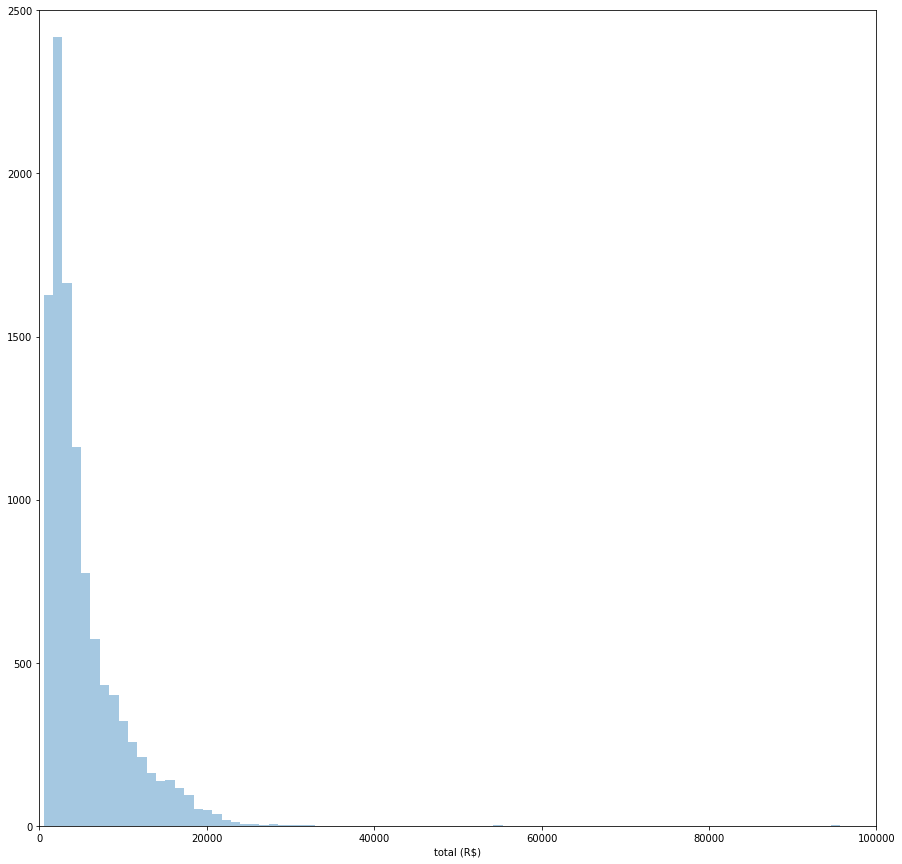

In [8]:
f,ax = plt.subplots(figsize = (15,15))
sns.distplot(dataset["total (R$)"],bins=1000,kde=False)
plt.axis([0,100000,0,2500])
plt.show()

![](https://scontent.fadb3-1.fna.fbcdn.net/v/t1.15752-9/94996357_3795479163857846_3176845381656903680_n.png?_nc_cat=102&_nc_sid=b96e70&_nc_ohc=mcYGlazCunAAX9exNG_&_nc_ht=scontent.fadb3-1.fna&oh=8efe7274a71a27a0c165e52991b7e841&oe=5ECE7DC7)

![](https://scontent.fadb3-1.fna.fbcdn.net/v/t1.15752-9/95214926_581108095849232_5438832239292973056_n.png?_nc_cat=104&_nc_sid=b96e70&_nc_ohc=8a4Ph1p8rukAX-TsbMj&_nc_ht=scontent.fadb3-1.fna&oh=9008c37f9e28caac8f78d07a6a021c79&oe=5ECC6568)

The point is between 2000 and 3000

<a id="5"></a><br>
### 5. How is the distribution of floors?

In [9]:
#Let's check counts
print(dataset.floor.value_counts())

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
23       25
25       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
46        1
35        1
51        1
301       1
Name: floor, dtype: int64


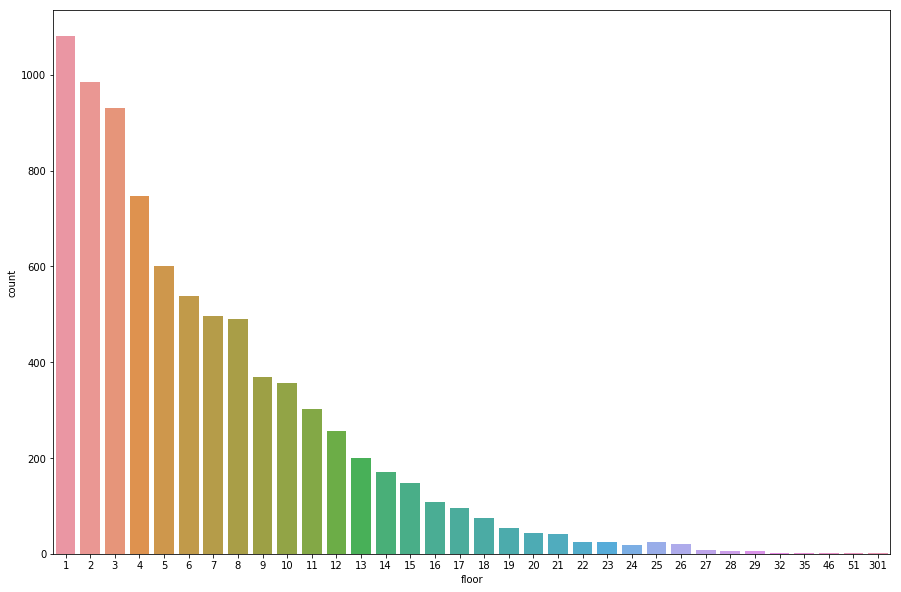

In [10]:
#Data cleaning
floor_data=dataset.drop(dataset[dataset.floor=='-'].index)
floor_data.floor=floor_data.floor.astype(int)

#Visualization Part
floor_data=floor_data.sort_values('floor')
floor_data.floor=floor_data.floor.astype(object)
plt.figure(figsize=(15,10))
sns.countplot(floor_data.floor)
plt.show()

<a id="6"></a><br>
### 6. Which city has the most expensive rent prices?

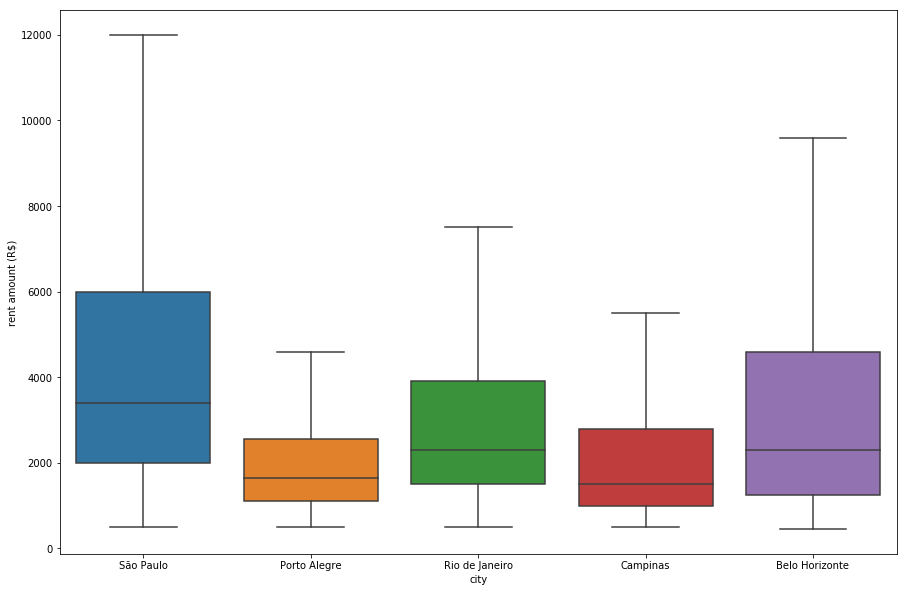

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x ='city',y='rent amount (R$)', data = dataset, showfliers = False)
plt.show()

It seems like Sao Paulo has the most expensive rent prices

<a id="7"></a><br>
### 7. Which floor is the most expensive?

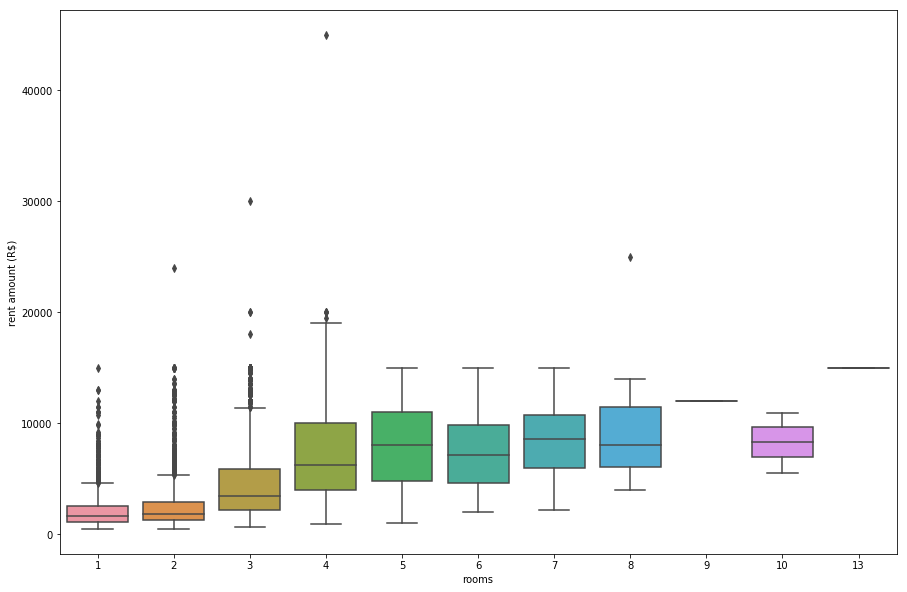

In [12]:
#I will change room feature as a categoric feature in order to create a boxplot
room_data=dataset.iloc[:,[2,9]]
room_data['rooms']=room_data['rooms'].astype(object)
plt.figure(figsize=(15,10))
sns.boxplot(x ='rooms',y='rent amount (R$)', data = dataset)
plt.show()

From the graph,the floors 5-8 are almost expensive. The answer could be either 5th or 7th floor.

<a id="8"></a><br>
### 8. Does the number of bathroom affects the rent amount?

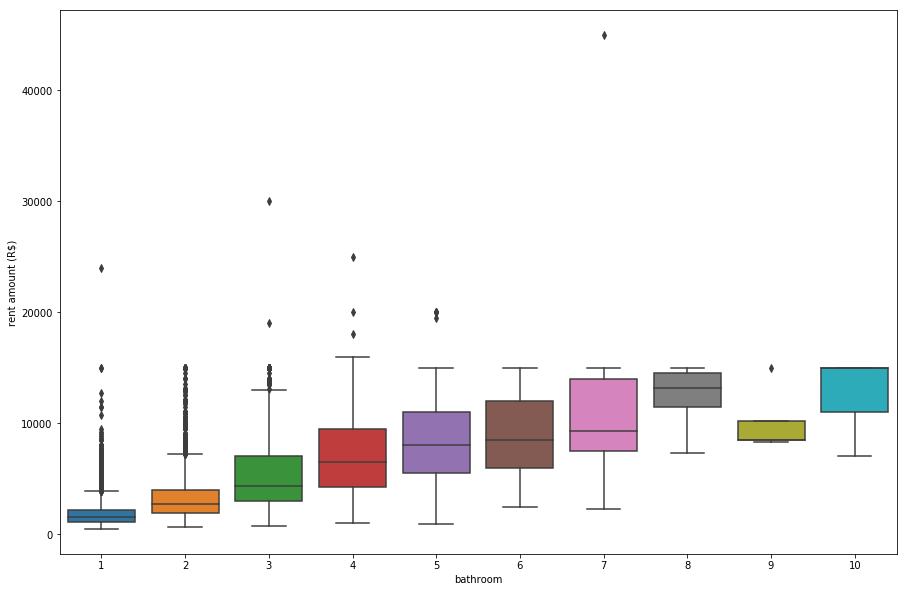

In [13]:
#I will change bathroom feature as a categoric feature to create a boxplot
categoric_bathroom=dataset.copy()
categoric_bathroom.bathroom=categoric_bathroom.bathroom.astype(object)
plt.figure(figsize=(15,10))
sns.boxplot(x ='bathroom',y='rent amount (R$)', data = categoric_bathroom)
plt.show()

Yes, as the number of bathrooms in a house increases, the rent also increases.

**General relationships between numeric features**

<Figure size 1080x720 with 0 Axes>

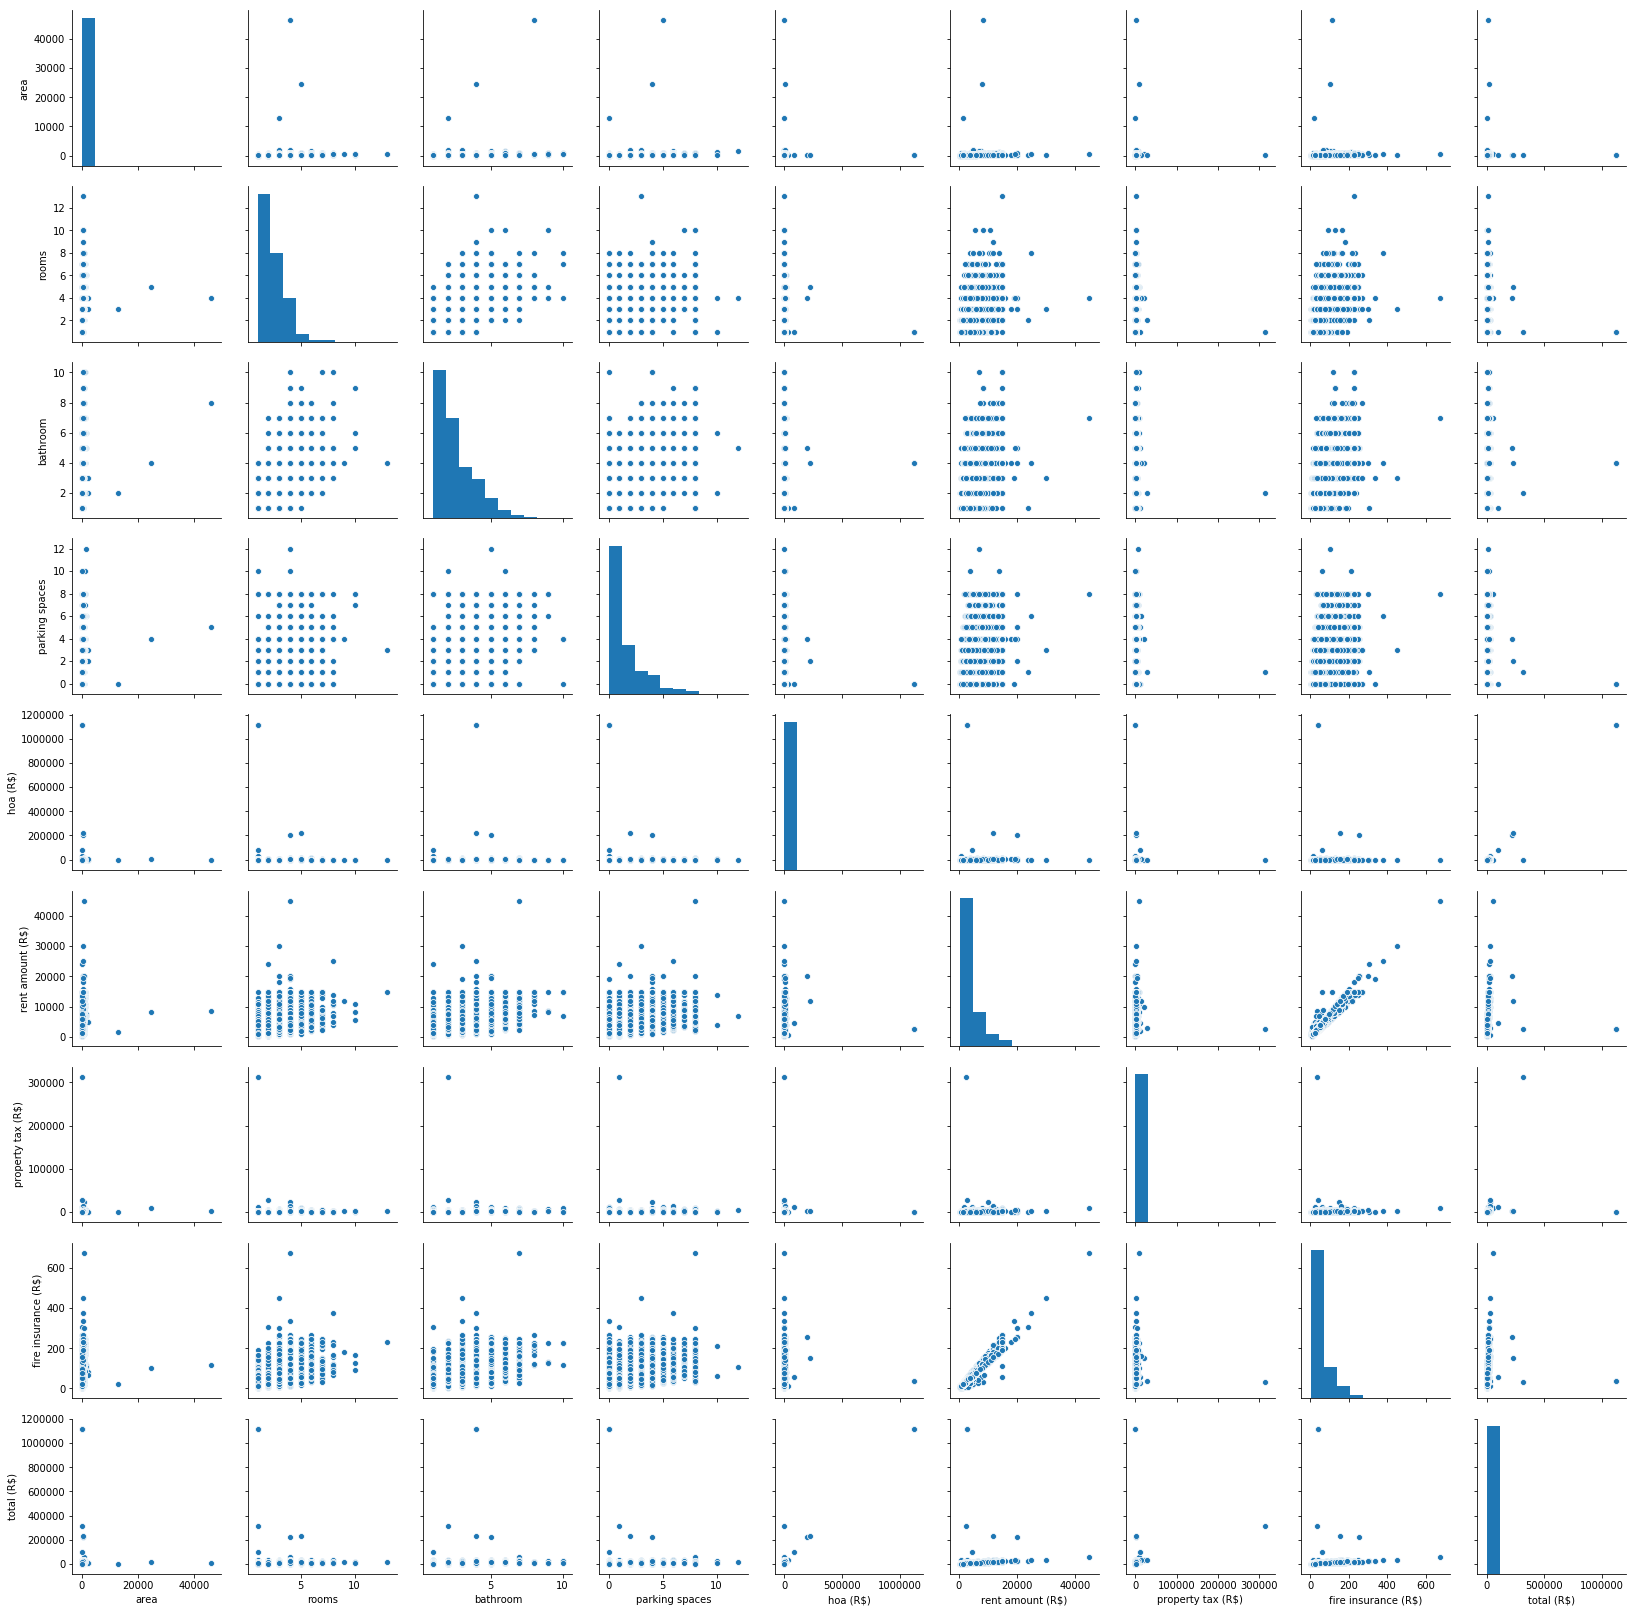

In [14]:
numeric_data=dataset.select_dtypes(include=['int64']).copy()
plt.figure(figsize=(15,10))
sns.pairplot(numeric_data)
plt.show()

**Correlation Heatmap to see correlations between numeric features**

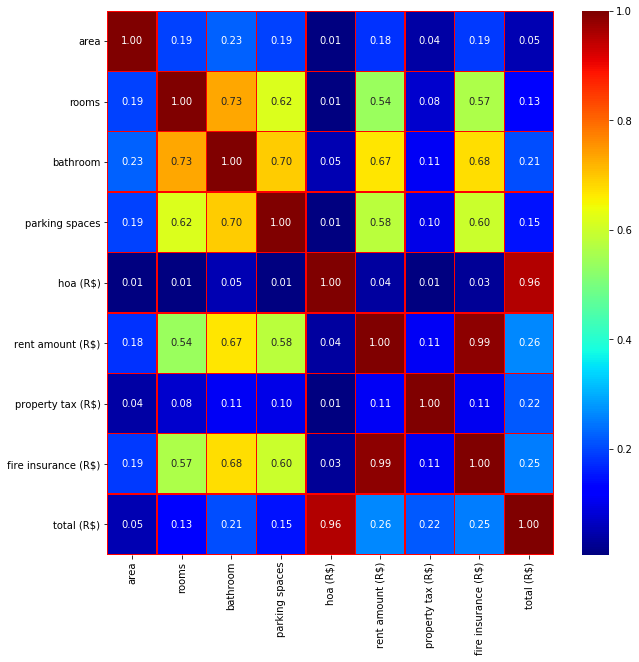

In [15]:
#Correlation Heatmap
corelation_matrix=numeric_data.corr()
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corelation_matrix, annot=True, linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax,cmap='jet')
plt.show()

<a id="9"></a><br>
### 9. How strong is the correlation between area,number of bathroom and rent amount?

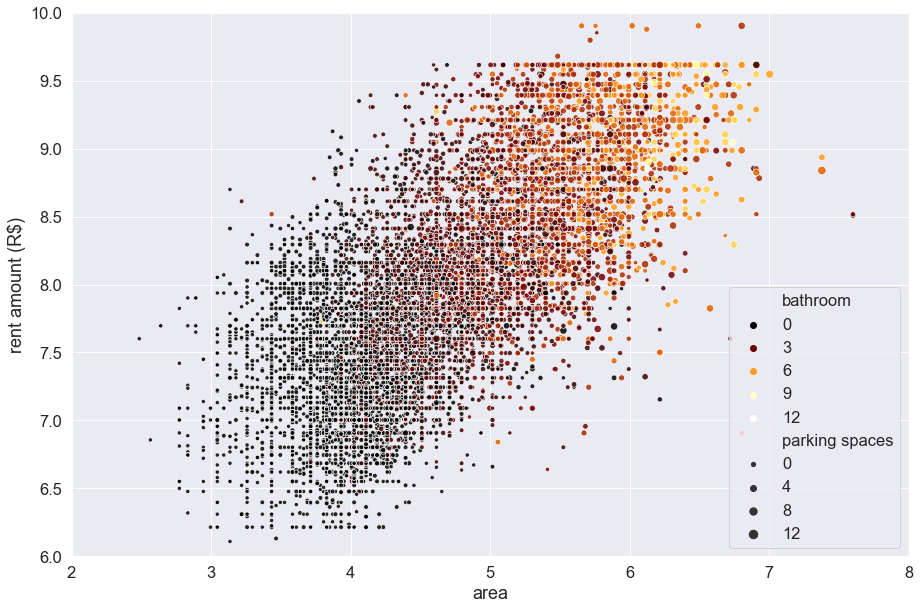

In [16]:
sns.set(font_scale=1.5)
#I'm gonna use np.log() because there are many outliers that prevents a clear visualization
plt.figure(figsize=(15,10))
sns.scatterplot( x =np.log(dataset['area']+1) , y = np.log(dataset['rent amount (R$)']), 
                hue = dataset['bathroom'],size=dataset['parking spaces'],
                palette="afmhot",alpha=0.85)
plt.axis([2,8,6,10])
plt.show()

<a id="10"></a><br>
### 10. How strong is the correlation between total amount and hoa?

<Figure size 1080x720 with 0 Axes>

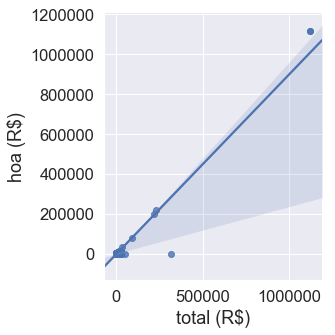

In [17]:
plt.figure(figsize=(15,10))
sns.lmplot(x='total (R$)',y='hoa (R$)',data=dataset)
plt.show()

<a id="11"></a><br>
### 11. How strong is the correlation between total amount and fire insurance?

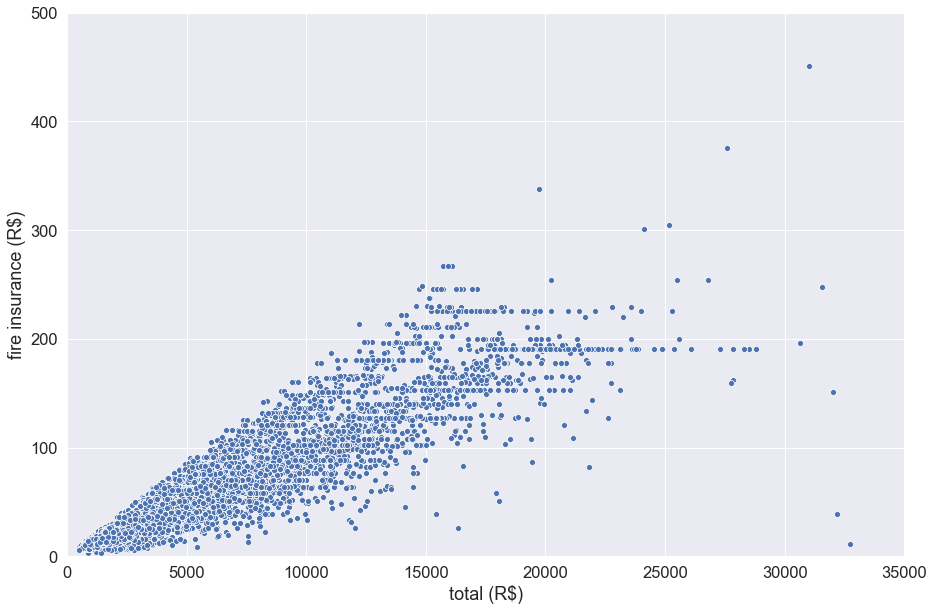

In [18]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='total (R$)',y='fire insurance (R$)',data=dataset)
plt.axis([0,35000,0,500])
plt.show()

<a id="12"></a><br>
### 12. How strong is the correlation between number of rooms, number of bathrooms and rent amount?

In [19]:
import plotly.express as px
fig = px.scatter_3d(numeric_data, x='rooms',
                    y='bathroom', 
                    z=np.log(numeric_data['rent amount (R$)']), #I used np.log() again because there are many outliers. So z represents rent amount
                   color='rooms', 
       color_continuous_scale='icefire'
       )
iplot(fig)

<a id="13"></a><br>
### 13. Which feature is correlated the most with rent amount: Area? Number of rooms? Parking Spaces?

In [20]:
#I will use a simple normalization technique in order to see all features in the same domain.
normalized_data=numeric_data.copy()
for column in normalized_data.columns:
    normalized_data[column]=normalized_data[column]/normalized_data[column].max()
    
normalized_data.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0.001511,0.153846,0.1,0.083333,0.001849,0.073333,0.000673,0.062038,0.005016
1,0.006906,0.307692,0.4,0.000000,0.001074,0.110222,0.005579,0.093058,0.007119
2,0.001727,0.076923,0.1,0.083333,0.000895,0.062222,0.000000,0.060561,0.003429
3,0.001101,0.153846,0.1,0.000000,0.000242,0.024711,0.000070,0.025111,0.001269
4,0.000540,0.076923,0.1,0.000000,0.000000,0.017778,0.000080,0.016248,0.000746


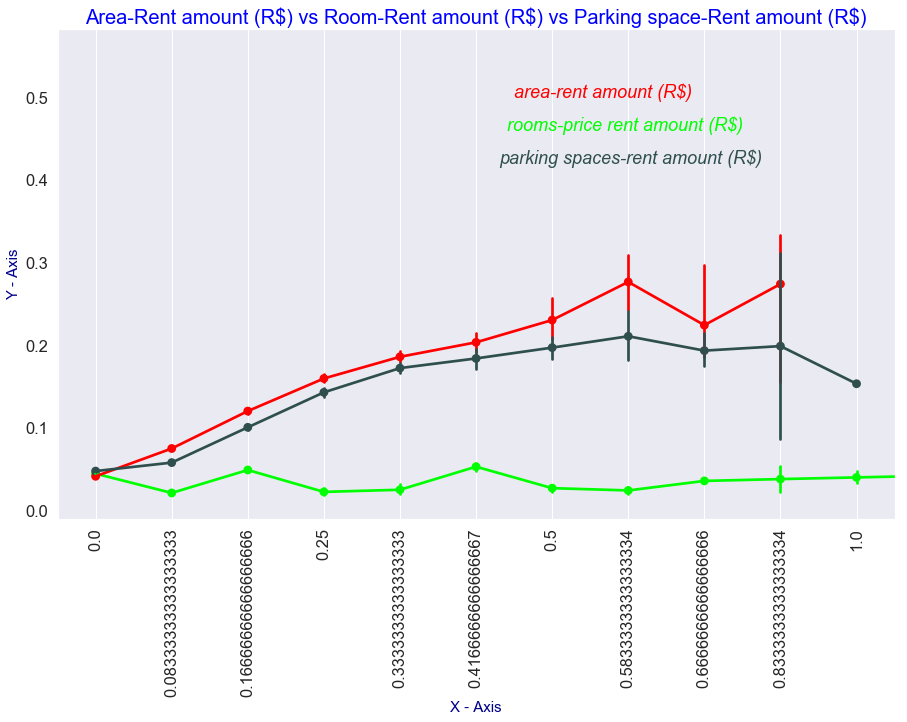

In [21]:
#Visualization part
fig,ax1 = plt.subplots(figsize =(15,9))
sns.pointplot(x=normalized_data['area'],y=normalized_data['rent amount (R$)'],data=normalized_data,color='lime',alpha=0.8)
sns.pointplot(x=normalized_data['bathroom'],y=normalized_data['rent amount (R$)'],data=normalized_data,color='red',alpha=0.8)
sns.pointplot(x=normalized_data['parking spaces'],y=normalized_data['rent amount (R$)'],data=normalized_data,color='darkslategray',alpha=0.6)
plt.xticks(rotation=90)
plt.text(5.5,0.50,'area-rent amount (R$)',color='red',fontsize = 18,style = 'italic')
plt.text(5.4,0.46,'rooms-price rent amount (R$)',color='lime',fontsize = 18,style = 'italic')
plt.text(5.3,0.42,'parking spaces-rent amount (R$)',color='darkslategray',fontsize = 18,style = 'italic')
plt.xlabel('X - Axis',fontsize = 15,color='darkblue')
plt.ylabel('Y - Axis',fontsize = 15,color='darkblue')
plt.title('Area-Rent amount (R$) vs Room-Rent amount (R$) vs Parking space-Rent amount (R$)',fontsize = 20,color='blue')
plt.grid()

Area is correlated the most with rent amount.